# MI-PYT feedback

Feedback for the [MI-PYT course](https://github.com/cvut/MI-PYT) was requested through a [feedback form application](https://github.com/encukou/feedback-form). The results are [public](https://github.com/cvut/MI-PYT/blob/master/stats/B161/results.csv).

We asked the students several optional questions:
* rate each lesson in three categories,
* give the *student's* final grade from the course,
* give full-text feedback,
* comment on what was missing from the course,
* provide private feedback.

Private feedback was provided by one person, and did not contain any new information, so we ignore it entirely.

In [1]:
import pandas
import matplotlib
import matplotlib.pyplot
import matplotlib.style
from IPython.core.display import display, HTML
import mistune

matplotlib.style.use('ggplot')
%matplotlib inline

## Data preparation


Lessons were rated in 3 categories:

In [2]:
category_questions = {   
    'like': 'How did you like the lesson? (Jak se ti lekce líbila?)',
    'topic': 'How relevant was the topic? (Jak přínosné bylo téma?)',
    'learn': 'How much did you learn? (Kolik nového ses naučil/a?)',
}

The `marks` DataFrame contains ratings of individual lessons in three different categories.
Ratings are converted to “points”: A=5 … F=0

In [3]:
marks = pandas.read_csv('results.csv').dropna()
marks['user_hash'] = marks['user_hash'].str[:7]
marks['lesson'] = marks['lesson'].astype(
    "category",
    categories=["requests-click", "flask", "moduly", "testovani", "dokumentace", "pandas",
                "numpy", "cython", "pyqt", "async", "magie", "micropython", "semestralka"],
    ordered=True,
)
marks['category'] = marks['category'].astype(
    "category",
    categories=["like", "topic", "learn"],
    ordered=False,
)
marks['answer'] = marks['answer'].apply({'A': 5, 'B': 4, 'C': 3, 'D': 2, 'E': 1, 'F': 0}.get)
marks = marks.set_index(['user_hash', 'lesson', 'category'])
marks = marks.unstack(['lesson', 'category'])
marks.columns = marks.columns.droplevel()
marks = marks.sort_index('columns', level=0)
marks.head()

lesson    requests-click             flask             moduly              \
category            like topic learn  like topic learn   like topic learn   
user_hash                                                                   
0237ac2              5.0   5.0   4.0   4.0   5.0   4.0    3.0   5.0   4.0   
10956e6              3.0   2.0   3.0   2.0   2.0   2.0    4.0   4.0   4.0   
26ad3dd              5.0   4.0   3.0   5.0   5.0   5.0    5.0   4.0   2.0   
4ecf3df              5.0   5.0   4.0   4.0   5.0   5.0    3.0   5.0   5.0   
5ae9c96              4.0   2.0   1.0   5.0   3.0   3.0    4.0   4.0   4.0   

lesson    testovani  ...  async magie             micropython              \
category       like  ...  learn  like topic learn        like topic learn   
user_hash            ...                                                    
0237ac2         3.0  ...    NaN   4.0   3.0   3.0         NaN   NaN   NaN   
10956e6         4.0  ...    3.0   4.0   4.0   4.0         4.0   2.0   4.0   
26ad3dd         5.0  ...    5.0   5.0   5.0   3.0         NaN   NaN   NaN   
4ecf3df         2.0  ...    0.0   4.0   2.0   1.0         NaN   NaN   NaN   
5ae9c96         3.0  ...    4.0   NaN   NaN   NaN         5.0   5.0   3.0   

lesson    semestralka              
category         like topic learn  
user_hash                          
0237ac2           3.0   3.0   0.0  
10956e6           3.0   2.0   3.0  
26ad3dd           5.0   5.0   5.0  
4ecf3df           3.0   4.0   5.0  
5ae9c96           NaN   NaN   NaN  

[5 rows x 39 columns]

The `answers` DataFrame contains answers without categories: full-text answers and grades.

In [4]:
answers = pandas.read_csv('results.csv')
answers = answers[answers['lesson'].isnull() & (answers['answer'] != '?')]
answers = answers.drop(['lesson'], 'columns').dropna()
answers['user_hash'] = answers['user_hash'].str[:7]
answers = answers.set_index(['user_hash', 'category'])
answers = answers.unstack()
answers.columns = answers.columns.droplevel()
answers.head()

category,mark,message,missing
user_hash,,,
0237ac2,D,"Prislo mi, ze to nebylo uplne jednoduchy. Vlas...",Knihovna logging
10956e6,B,None,"Ne, že by se tam do toho kurzu vešlo ještě víc..."
26ad3dd,B,None,None
3e0d36c,B,"Ahoj, pacilo sa mi prevedenie predmetu a celko...",None
4ecf3df,D,"Pandas, numpy, cython už jsem dělal v práci, p...",Nic mě nenpadá


## Number of responses

In [5]:
print('Number of people who rated individual lessons:',
      marks.index.nunique())
print('Number of people who answered full-text questions:',
      answers.dropna(subset=['message', 'missing'], thresh=1).index.nunique())

Number of people who rated individual lessons: 13
Number of people who answered full-text questions: 10


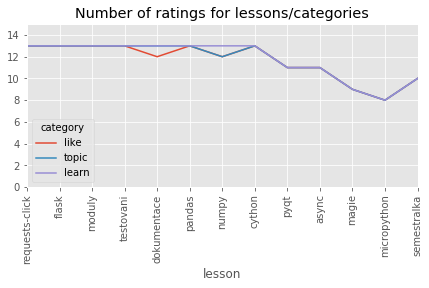

In [6]:
data = marks.unstack().groupby(level=[0, 1]).agg(['count']).unstack()
data.columns = data.columns.droplevel()
plot = data.plot(ylim=(0, 15), rot=90, figsize=(7, 3), title='Number of ratings for lessons/categories')
plot.set_xticks(range(len(data)))
plot.set_xticklabels(data.index);


## Lesson ratings

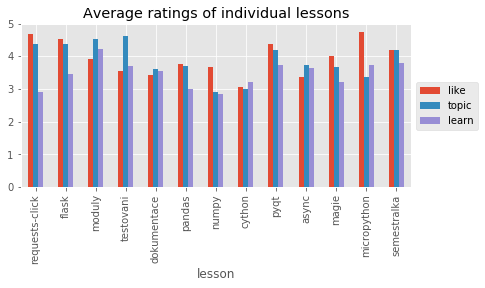

In [7]:
plot = marks.stack().groupby(level=1).mean().T.plot.bar(
    figsize=(7, 3),
    title='Average ratings of individual lessons'
)
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [8]:
# The `counts` DataFrame holds the number of times a rating was selected for a particular lesson/category
counts = marks.stack().stack().to_frame('value').reset_index(['user_hash', 'category', 'lesson']).groupby(['value', 'category', 'lesson']).count().swaplevel().unstack().unstack().fillna(0)
counts.columns = counts.columns.droplevel()
counts = counts.sort_index(ascending=False)
counts

category           like                                                  \
lesson   requests-click flask moduly testovani dokumentace pandas numpy   
value                                                                     
5.0                10.0   9.0    4.0       3.0         2.0    2.0   2.0   
4.0                 2.0   3.0    4.0       4.0         4.0    7.0   5.0   
3.0                 1.0   0.0    5.0       4.0         4.0    3.0   4.0   
2.0                 0.0   1.0    0.0       1.0         1.0    1.0   1.0   
1.0                 0.0   0.0    0.0       1.0         1.0    0.0   0.0   
0.0                 0.0   0.0    0.0       0.0         0.0    0.0   0.0   

category                       ...         learn                           \
lesson   cython pyqt async     ...     testovani dokumentace pandas numpy   
value                          ...                                          
5.0         3.0  6.0   2.0     ...           3.0         3.0    3.0   2.0   
4.0         2.0  3.0   3.0     ...           6.0         6.0    4.0   3.0   
3.0         2.0  2.0   3.0     ...           1.0         2.0    2.0   3.0   
2.0         5.0  0.0   3.0     ...           3.0         0.0    1.0   2.0   
1.0         1.0  0.0   0.0     ...           0.0         1.0    0.0   2.0   
0.0         0.0  0.0   0.0     ...           0.0         1.0    3.0   1.0   

category                                                  
lesson   cython pyqt async magie micropython semestralka  
value                                                     
5.0         3.0  5.0   4.0   1.0         3.0         6.0  
4.0         4.0  2.0   3.0   3.0         2.0         0.0  
3.0         2.0  2.0   2.0   3.0         2.0         2.0  
2.0         2.0  1.0   1.0   1.0         0.0         1.0  
1.0         1.0  0.0   0.0   1.0         1.0         0.0  
0.0         1.0  1.0   1.0   0.0         0.0         1.0  

[6 rows x 39 columns]

In [9]:
def plot_counts(counts, category):
    """Make 2 graphs for answers from the given category"""
    title = category_questions[category]

    # Box plot
    data = marks.T.swaplevel().loc[category].T
    data.plot.box(rot=90, showmeans=True, figsize=(8.29, 3), title=title)

    # Table plot
    data = counts[category].astype(float) / counts[category].sum().astype(float)
    matplotlib.pyplot.figure(figsize=(18, 4))
    matplotlib.pyplot.xticks(rotation=90)
    plot = matplotlib.pyplot.imshow(data, cmap='inferno', vmin=0, vmax=1).axes
    plot.set_xticks(range(len(data.columns)))
    plot.set_xticklabels(data.columns)
    plot.set_yticks(range(6))
    plot.set_yticklabels('ABCDEF')
    plot.set_title(title)
    plot.grid('off')

    from matplotlib import patheffects
    path_effects = [patheffects.withSimplePatchShadow(shadow_rgbFace=(1,1,1))]
    for i, z in enumerate(data.index):
        for j, z in enumerate(data.columns):
            plot.text(j, i, '{}%'.format(int(data.iloc[i, j] * 100)),
                      size='medium', ha='center', va='center',
                      path_effects=path_effects)

### Enjoyment

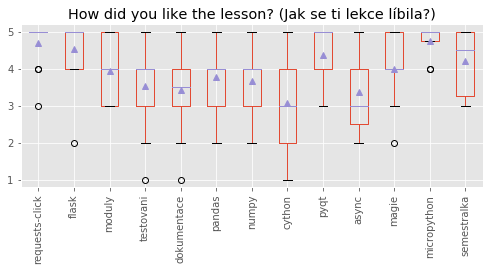

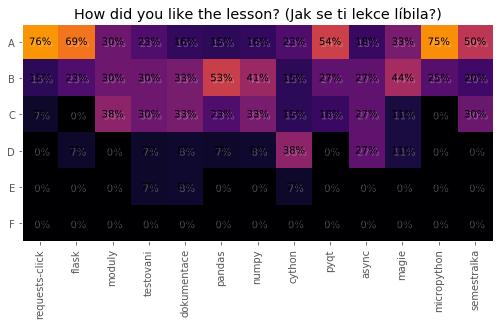

In [10]:
plot_counts(counts, 'like')

The most enjoyable lessons were MicroPython, Web technologies (requests/click, Flask), PyQT, and the final project.

The least enjoyable wac C API/Cython, followed by maintenance (testing, docs) and the asyncio lessons.

### Relevance

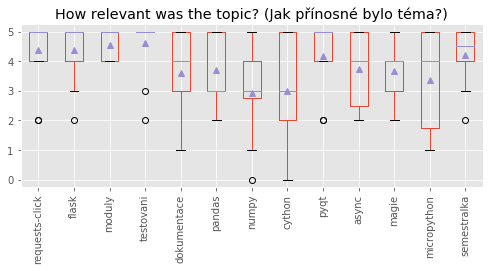

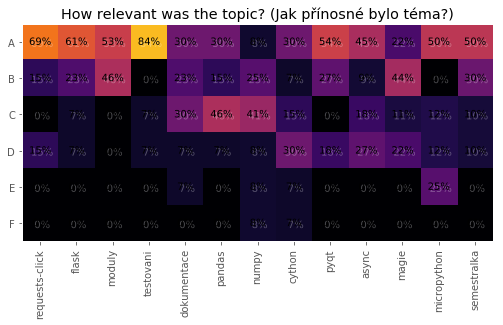

In [11]:
plot_counts(counts, 'topic')

In lots of lessons, the ratings were split between A/C, A/D or even A/E. This suggests that different students consider different topics useful.
(It could also mean that there were some students that consider almost everything useful, and some that didn't find much. I don't think this is the case, at least in this data set, but I'm struggling to find a good method to test this.)

### Learning

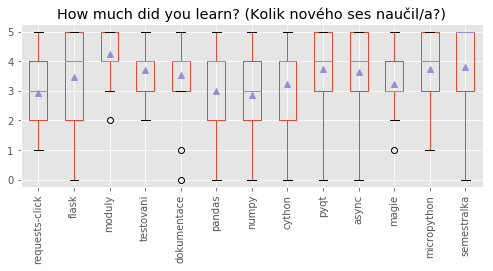

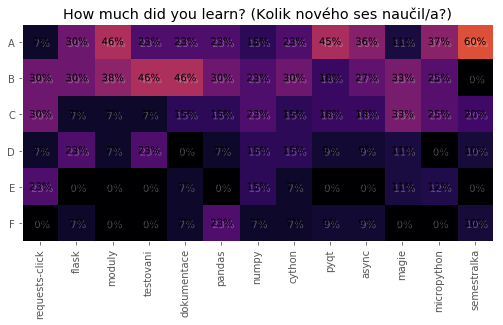

In [12]:
plot_counts(counts, 'learn')

Of the three categories, “How much did you learn?” got the lowest scores.

Students learned most from the lesson about modules and distribution, and from their final project.
They learned least from lessons about the most popular libraries: Requests/Click, Pandas and Numpy.

## Textual answers

In [13]:
def show_messages(messages):
    list_items = ['<li>{}</li>'.format(mistune.markdown(m)) for m in sorted(messages)]
    return display(HTML('<ul>{}</ul>'.format(''.join(list_items))))

### General comments

In [14]:
show_messages(answers['message'].dropna())

### What was missing

In [15]:
show_messages(answers['missing'].dropna())

## Summary

Students generally agre that the course was very difficult, but still useful.

The first half of the course was easier, more enjoyable, and consistently thought to be relevant.
In the second half, enjoyment dropped as the difficulty increased. Also, relevance was hit-or-miss.

Students didn't really agree on one thing that was should be added to the course. Candidates are web scraping (BeautifulSoup, Scrapy) or Web apps (Django, WTForms, Web apps in general), but it seems it would be better to not add any new topics.

Cython and C API turned out to be the worst lesson overall. If more time is needed for other topics, and if it's not needed in a project, it would make sense to drop it.

We'll combine this data with the answers from the school survey (which are not public), and mainly use that to make the course better.
Keep an eye out for a blog post on [blog.python.cz](http://blog.python.cz) for a more general summary.